In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
# from keras.datasets import mnist
from tensorflow.keras.datasets import imdb
from tensorflow.keras.datasets import reuters

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [3]:
# Loading the data
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1410s 81us/step


In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
# word from index
word_index = imdb.get_word_index()
reverse_word_index = dict(
        [(value,key) for (key,value) in word_index.items()])
def review_from_array(review_array):  
    decoded_review = ' '.join(
        [reverse_word_index.get(i-3, "?") for i in review_array])
    return decoded_review

In [5]:
review_from_array(train_data[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [6]:
# encoding integer sequence into binary matrix
# one hot encoding

def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    
    for i,sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [7]:
x_train = vectorize_sequences(train_data)

In [8]:
x_test = vectorize_sequences(test_data)

In [9]:
x_train.shape

(25000, 10000)

In [10]:
# vectorise labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
# model definition

model = models.Sequential()
model.add(layers.Dense(16,
                       activation='relu', 
                       input_shape=(10000,)))
model.add(layers.Dense(16,
                      activation='relu'))
model.add(layers.Dense(1,
                      activation='sigmoid'))

In [12]:
# compilling the model

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# # alternatively for configuring optimizer

# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

# # using custom losses and metrics
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#              loss=losses.binary_crossentropy,
#              metrics=[metrics.binary_accuracy])

In [13]:
# validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
# training the model
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 264us/step - loss: 0.5051 - acc: 0.7868 - val_loss: 0.3783 - val_acc: 0.8705
Epoch 2/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.2997 - acc: 0.9049 - val_loss: 0.2999 - val_acc: 0.8895
Epoch 3/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.2170 - acc: 0.9289 - val_loss: 0.3077 - val_acc: 0.8715
Epoch 4/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1742 - acc: 0.9434 - val_loss: 0.2824 - val_acc: 0.8847
Epoch 5/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.1414 - acc: 0.9544 - val_loss: 0.2854 - val_acc: 0.8862
Epoch 6/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.1140 - acc: 0.9658 - val_loss: 0.3120 - val_acc: 0.8792
Epoch 7/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.0969 - acc: 0.9708 - val_loss: 0.3147 - 

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

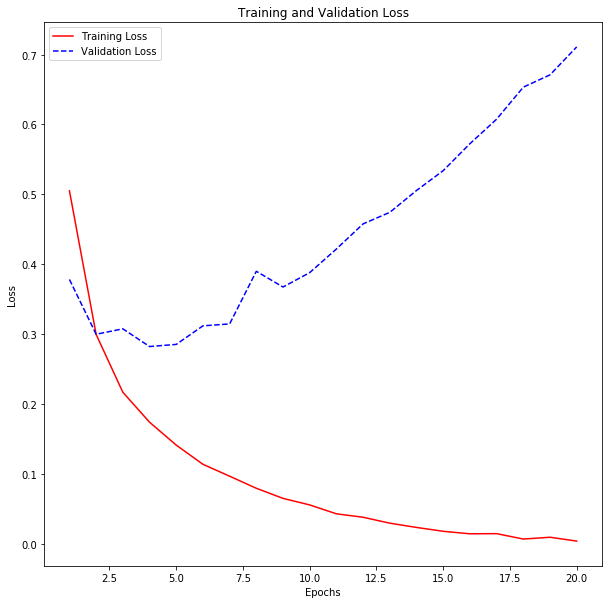

In [16]:
# plotting training and validation loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(10,10))
plt.plot(epochs, loss_values, 'r-', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b--', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();


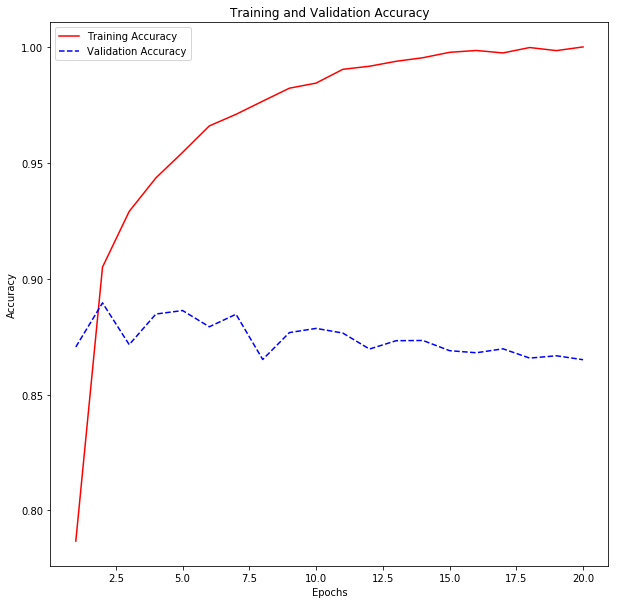

In [17]:
# plotting training and validation accuracy

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(10,10))
plt.plot(epochs, acc_values, 'r-', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b--', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

In [18]:
# Retraining model from scratch

model2 = models.Sequential()
model2.add(layers.Dense(16,
                      activation='relu',
                      input_shape=(10000,)))
model2.add(layers.Dense(16,activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=4, batch_size=512)
results = model2.evaluate(x_test,y_test)
print('\ntest loss: ',results[0],' test accuracy: ',results[1])

Epoch 1/4
25000/25000 [==============================] - 3s 132us/step - loss: 0.4740 - acc: 0.8215
Epoch 2/4
25000/25000 [==============================] - 2s 88us/step - loss: 0.2676 - acc: 0.9093
Epoch 3/4
25000/25000 [==============================] - 2s 83us/step - loss: 0.2034 - acc: 0.9287
Epoch 4/4
25000/25000 [==============================] - 4s 155us/step

test loss:  0.31270571454048157  test accuracy:  0.87548


In [33]:
# prediction
print(review_from_array(test_data[3]))
model2.predict(x_test[3:4])
# model2.predict(x_test[3].reshape([1,-1]))

? i generally love this type of movie however this time i found myself wanting to kick the screen since i can't do that i will just complain about it this was absolutely idiotic the things that happen with the dead kids are very cool but the alive people are absolute idiots i am a grown man pretty big and i can defend myself well however i would not do half the stuff the little girl does in this movie also the mother in this movie is reckless with her children to the point of neglect i wish i wasn't so angry about her and her actions because i would have otherwise enjoyed the flick what a number she was take my advise and fast forward through everything you see her do until the end also is anyone else getting sick of watching movies that are filmed so dark anymore one can hardly see what is being filmed as an audience we are ? involved with the actions on the screen so then why the hell can't we have night vision


array([[0.63817936]], dtype=float32)